# Data Preparation
We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data sanitizing.

In [1]:
import pandas as pd

We will look at bike traffic and we want to predict how much bike traffic we can expect based on what the weather is like.

Do be able to do this, we need data on bike traffic and data on weather conditions. Fortunately, the city of Ottawa has a few bike counters gather daily counts of cyclists along certain routes. Their Open Data website is very helpful. For the weather, we can use Environment Canada which lets you download historical weather data. We can combine these two data sets to get our training data.

Let's first read the cycling data:

In [2]:
# https://open.ottawa.ca/documents/bicycle-trip-counters/about
bike2020 = pd.read_excel('./data/bike_counter.xlsx', sheet_name="2020")

Let's see what we got

In [3]:
bike2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   1^ALEX     257 non-null    float64       
 2   2^ORPY     257 non-null    float64       
 3   3^COBY     267 non-null    float64       
 4   4^CRTZ     366 non-null    int64         
 5   5^LMET     366 non-null    int64         
 6   10^OGLD    360 non-null    float64       
 7   11 OBVW    365 non-null    float64       
 8   12a^ADAWE  336 non-null    float64       
 9   12b^ADAWE  336 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 28.7 KB


The column names are very cryptic, but they are explained on the website. They are just the various routes that data was collected on. Notice that we have 366 entries, but if we look at the routes, we don't always have 366 non-null values (leap year!). This indicates missing data!

This is fairly typical for raw datasets. Something things break and measurements cannot be collected.

Lets see if our data is ok. We can use the various plotting functions for checking the data.

<Axes: xlabel='Date', ylabel='[12b^ADAWE]'>

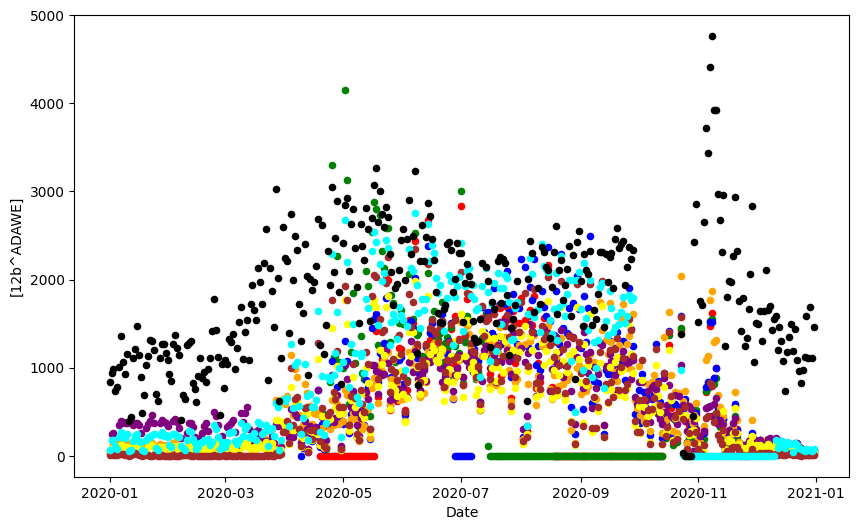

In [4]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

Suspicious amount of measurements are 0 in a row. Either the road was closed or the counter was maybe broken? We should probably get rid of that data. Lets set it to NaN. Assumption here is that there is at least one cyclist every day, even in the worst of weathers. Is that valid?

In [5]:
# Loop over all column names except the Date column
for colname in bike2020.columns.drop('Date'):
    bike2020.loc[bike2020[colname] <= 0.01, colname] = pd.NA

<Axes: xlabel='Date', ylabel='[12b^ADAWE]'>

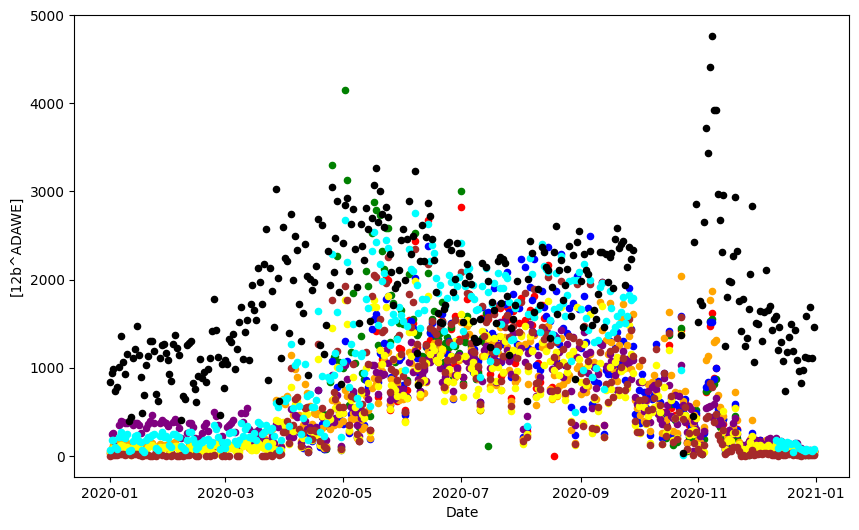

In [6]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

Better! Black plot looks odd though. Weird peak in November for "12b^ADAWE". Website refers to this as "Adàwe Crossing Pedestrians". Is that really cyclists?

Now lets take a look at the weather

In [8]:
# https://climate.weather.gc.ca/climate_data/daily_data_e.html?hlyRange=2011-12-14%7C2023-01-25&dlyRange=2011-12-15%7C2023-01-25&mlyRange=%7C&StationID=49568&Prov=ON&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2023&selRowPerPage=25&Line=14&searchMethod=contains&txtStationName=ottawa&timeframe=2&time=LST&Day=25&Year=2020&Month=1#
weather2020 = pd.read_csv('./data/en_climate_daily_ON_6106001_2020_P1D.csv')
weather2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              366 non-null    float64
 1   Latitude (y)               366 non-null    float64
 2   Station Name               366 non-null    object 
 3   Climate ID                 366 non-null    int64  
 4   Date/Time                  366 non-null    object 
 5   Year                       366 non-null    int64  
 6   Month                      366 non-null    int64  
 7   Day                        366 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              362 non-null    float64
 10  Max Temp Flag              4 non-null      object 
 11  Min Temp (°C)              362 non-null    float64
 12  Min Temp Flag              4 non-null      object 
 13  Mean Temp (°C)             362 non-null    float64

Lots of columns have only a few data points. Might as well get rid of those.

In [9]:
weather2020.drop(['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag'], inplace=True, axis=1)

We can also get rid of the columns that don't add anything. Like location since all this data is from the same weather station. Also day, month, year we don't need since we have Date/Time.

In [10]:
weather2020.drop(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year', 'Month', 'Day'], inplace=True, axis=1)

Finally, all the "Flag" columns are just notes on data. They are explained on the webpage, but lets just drop those too.

In [11]:
weather2020.drop(['Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag'], inplace=True, axis=1)

Let's plot some of the data to see if it looks ok.

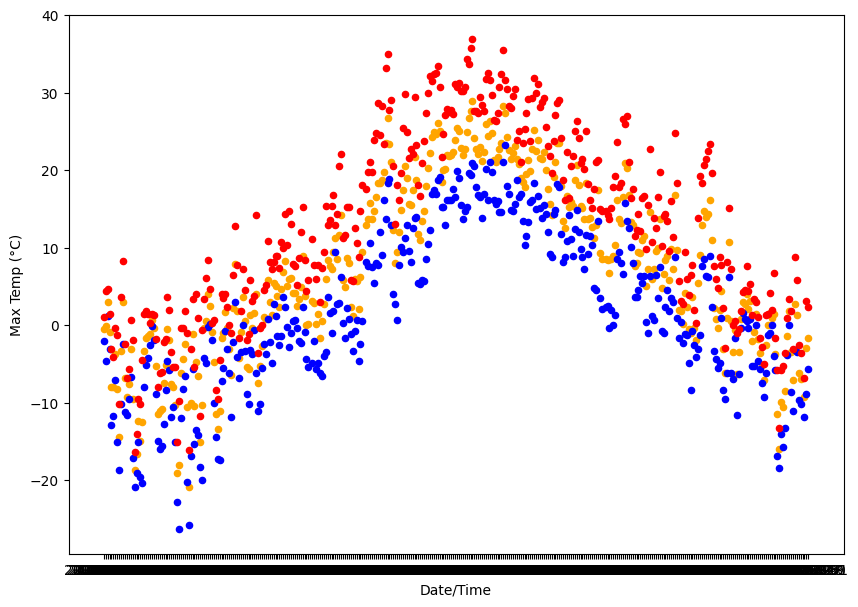

In [12]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

That looks alright, although the x-axis is very weird. Issue can be seen from `.info()` above. Date is an object, but should be datetime64. Two ways to correct this. Either specify type during reading or correct afterwards.

In [13]:
weather2020['Date/Time'] = weather2020['Date/Time'].astype('datetime64')

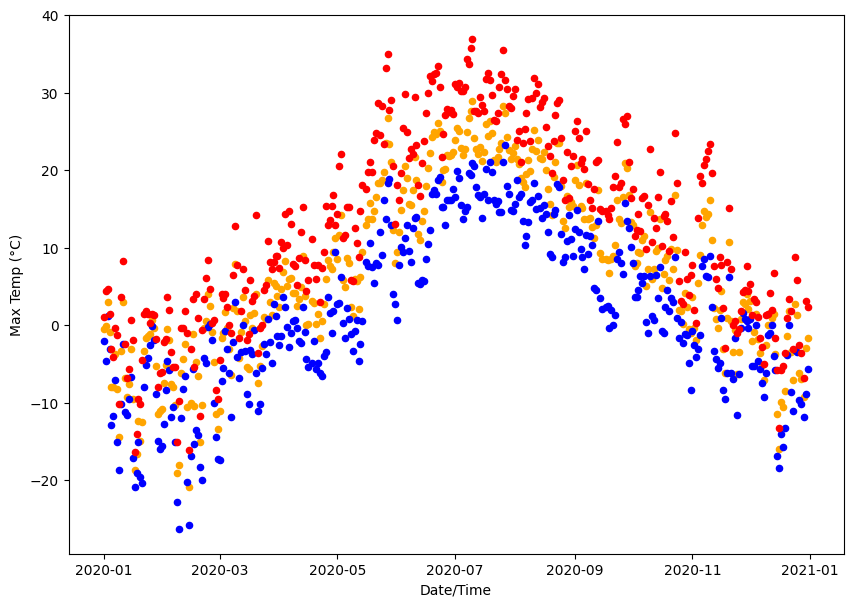

In [14]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

Looks good! Now we need to combine our two datasets (the routes and corresponding year's weather) so we can actually relate things to each other. Pandas comes with a merge function that lets you merge two datasets on a certain column. In our case, that would be Date and Date/Time.

In [17]:
data2020 = pd.merge(left=bike2020, right=weather2020, left_on='Date', right_on='Date/Time')
data2020.drop('Date/Time', inplace=True, axis=1)

Show all columns

In [18]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', '12b^ADAWE', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')

Data exploration

<Axes: xlabel='Mean Temp (°C)', ylabel='1^ALEX'>

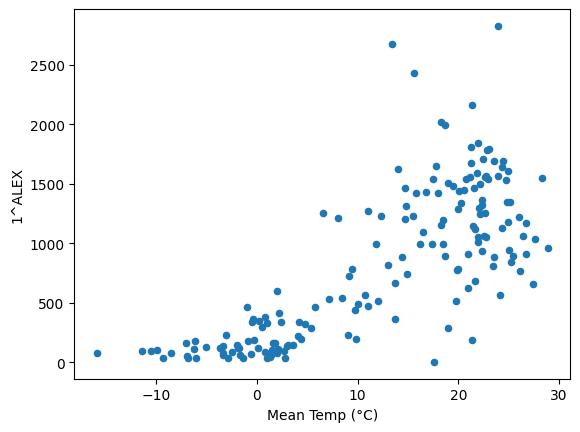

In [19]:
data2020.plot(kind='scatter', x='Mean Temp (°C)', y='1^ALEX')

There definitely seems to be a relation between temperature and number of cyclists on the NCC Alexandra Bridge Bikeway. Also note that we don't really go under -10 °C much. Reading the description of the bike counter data on the website.

> Winter Counts:
> 
> Only the counters designated as 'winter' counters have valid data after the first snow accumulation, until snow has been removed or melted away in spring. Winter counters imply some winter maintenance of the pathway or bike lane. The Somerset counter bike lane (westbound only) is cleared of snow on a best-effort basis only, and typically will not show all the cyclists along that route immediately following a heavy snow-fall.

And this counter is indeed not marked as winter. So it's simply not plowed.

How about rain?

<Axes: xlabel='Total Rain (mm)', ylabel='12a^ADAWE'>

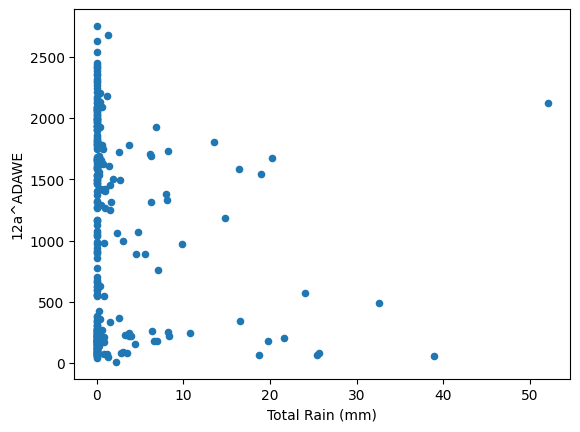

In [20]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='12a^ADAWE')

It looks like it doesn't rain that often in Ottawa. This is a good example of potential bias. We have lots more data for non-rainy days so it might overpower our learning algorithm.

Also, what's up with that massive rainfall and so many cyclists? That seems suspicious. This is probably an outlier and we should get rid of it. Let's check another counter.

<Axes: xlabel='Total Rain (mm)', ylabel='4^CRTZ'>

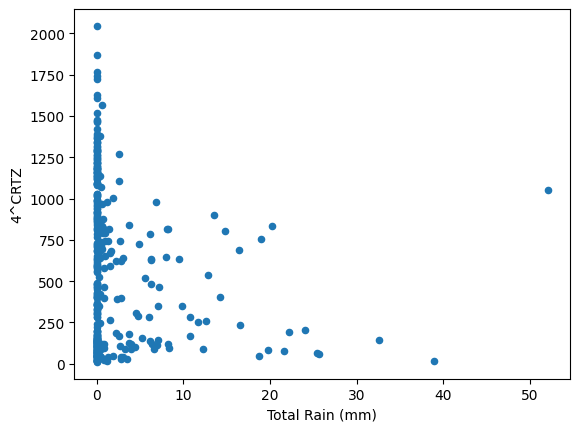

In [21]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='4^CRTZ')

That is not right. Let's see the whole row

In [22]:
data2020[data2020['Total Rain (mm)'] > 50]

,Date,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,...,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
156,2020-06-05,1452.0,2340.0,1527.0,1054.0,1297.0,1129.0,1461.0,2125.0,2294.0,...,11.3,20.6,0.0,2.6,52.1,0.0,52.1,NaN,20.0,52.0


Either the rain sensor was malfunctioning or the bike counters don't like lots of rain. Better get rid of that row.

In [23]:
data2020.drop(156, inplace=True)

Now that our data is mostly reasonable. Let's look at more correlations. Dark blue means large negative correlation, dark red means large positive correlation. These are the weather conditions having the most impact on the number of cyclists.

In [24]:
corr = data2020.select_dtypes(['number']).corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/tmp/ipykernel_22501/1826579227.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
1^ALEX,1.00,0.90,0.97,0.89,0.87,0.97,0.95,0.88,0.42,0.78,0.70,0.76,-0.77,0.48,-0.17,-0.24,-0.21,0.00,0.00,-0.18
2^ORPY,0.90,1.00,0.81,0.68,0.78,0.90,0.90,0.87,0.55,0.68,0.55,0.63,-0.68,0.24,-0.20,-0.22,-0.24,-0.15,0.06,-0.08
3^COBY,0.97,0.81,1.00,0.86,0.91,0.95,0.93,0.88,0.42,0.77,0.67,0.73,-0.75,0.39,-0.23,-0.23,-0.26,-0.04,0.04,-0.21
4^CRTZ,0.89,0.68,0.86,1.00,0.87,0.88,0.84,0.89,0.63,0.81,0.71,0.77,-0.78,0.44,-0.17,-0.26,-0.24,-0.33,0.04,-0.15
5^LMET,0.87,0.78,0.91,0.87,1.00,0.89,0.88,0.92,0.48,0.82,0.75,0.80,-0.80,0.51,-0.13,-0.26,-0.21,0.18,0.08,-0.14
10^OGLD,0.97,0.90,0.95,0.88,0.89,1.00,0.99,0.96,0.66,0.79,0.69,0.76,-0.77,0.42,-0.16,-0.24,-0.22,-0.29,0.04,-0.12
11 OBVW,0.95,0.90,0.93,0.84,0.88,0.99,1.00,0.95,0.53,0.79,0.69,0.75,-0.76,0.43,-0.15,-0.23,-0.21,-0.28,0.06,-0.11
12a^ADAWE,0.88,0.87,0.88,0.89,0.92,0.96,0.95,1.00,0.76,0.85,0.77,0.82,-0.84,0.44,-0.13,-0.28,-0.21,-0.19,0.04,-0.15
12b^ADAWE,0.42,0.55,0.42,0.63,0.48,0.66,0.53,0.76,1.00,0.49,0.40,0.45,-0.52,0.00,-0.25,-0.34,-0.35,-0.45,0.07,-0.16
Max Temp (°C),0.78,0.68,0.77,0.81,0.82,0.79,0.79,0.85,0.49,1.00,0.94,0.99,-0.97,0.66,0.11,-0.31,0.01,-0.37,0.01,0.01


There is very little correlation between 12b^ADAWE and all the other counters which is another indication that something is up with that counter. It's probably just pedestrians.

We see a strong positive correlation with correlation. People cycle more when it's warmer. There's a fairly strong negative correlation with "Heat Deg Days (°C)", but what is that? From the source website:

> **Heating Degree-days**
> 
> Heating degree-days for a given day are the number of degrees Celsius that the mean temperature is below 18 °C. If the temperature is equal to or greater than 18 °C, then the number will be zero. For example, a day with a mean temperature of 15.5 °C has 2.5 heating degree-days; a day with a mean temperature of 20.5 °C has zero heating degree-days. Heating degree-days are used primarily to estimate the heating requirements of buildings.

So it's just a day on which people turn on their heating. I.e. cold days.

Other correlations here a snow, rain and wind speed. Direction of wind doesn't matter much.

The other thing we need to think about for the data columns is how independent they are. That is, it doesn't make sense to predict the number of cyclist on both max temp and mean temp since the correlation is almost 1. They carry essentially the same information so we would just be introducing ambiguity into the model. It will still work in most cases, but the impact of features becomes less clear.

Same with total precipitation and total rain. It's probably better to take either just precipitation or only snow and rain.

Ok, so lets get rid of 12b^ADAWE, Min Temp (°C), Mean Temp (°C), and Total Precip (mm).

In [25]:
data2020.drop(['12b^ADAWE', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Precip (mm)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)'], inplace=True, axis=1)

We now have a pretty clean data set, but there is still some missing data

In [26]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     171 non-null    float64       
 2   2^ORPY                     166 non-null    float64       
 3   3^COBY                     256 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    356 non-null    float64       
 7   11 OBVW                    329 non-null    float64       
 8   12a^ADAWE                  288 non-null    float64       
 9   Max Temp (°C)              361 non-null    float64       
 10  Total Rain (mm)            364 non-null    float64       
 11  Total Snow (cm)            364 non-null    float64       
 12  Snow on 

Only three of the seven counters have daily data. Weather data is missing on some days. We could drop all the rows that have missing data, but...

In [27]:
len(data2020.dropna())

13

Only 13 rows left. Let's not do that! What else can we do though? We can impute data, which is basically fancy lying. We could substitute the NaN values with the mean, or we could use interpolation of neighbouring days. Anything that could lead to reasonable guesses.

For example, the "Snow on Grnd (cm)" is missing a lot of values. Let's see what's up with that.

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

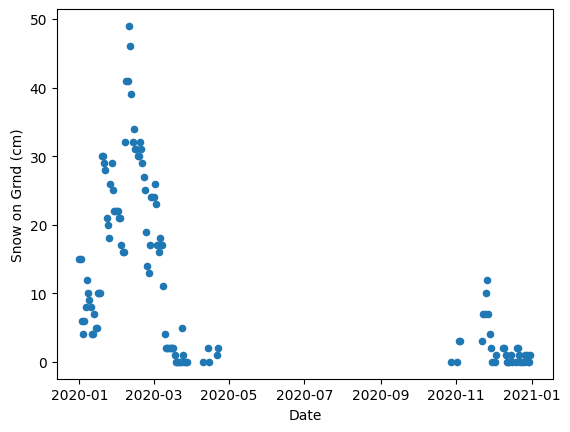

In [28]:
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

Right, they just don't measure the snow on the ground in the summer. We can fill all missing values with 0 maybe.

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

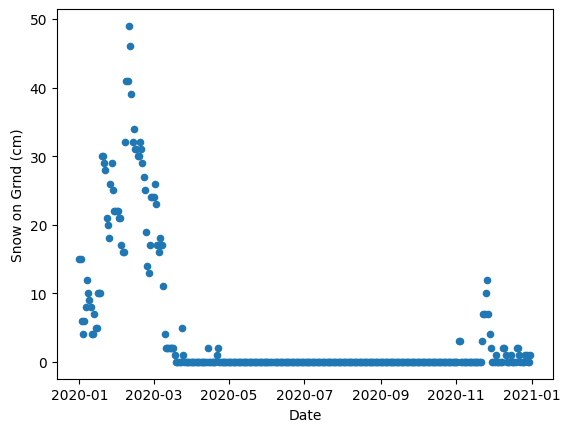

In [29]:
data2020.fillna({'Snow on Grnd (cm)': 0}).plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

That's a bit too much. Might be better to use the backfill method which just take the value from the next day to fill in NaN

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

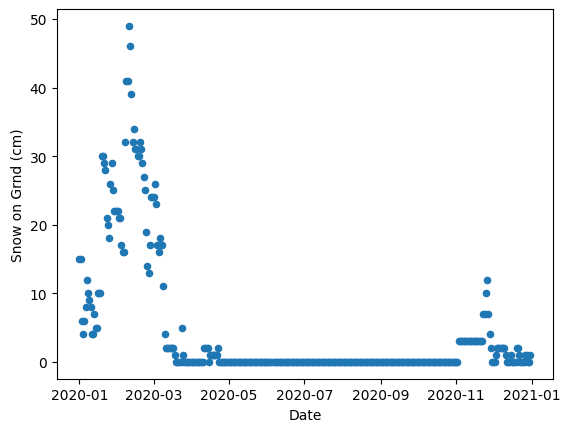

In [30]:
data2020['Snow on Grnd (cm)'] = data2020['Snow on Grnd (cm)'].fillna(method='backfill')
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

That looks better. Lets see how many complete rows we have now.

In [31]:
len(data2020.dropna())

53

Better indeed!

Next is the missing data for the wind gusts

<Axes: xlabel='Date'>

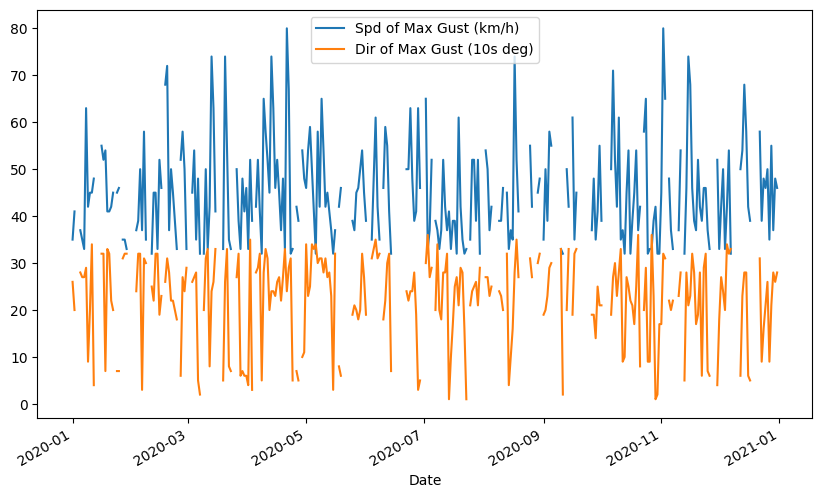

In [32]:
data2020.plot(x='Date', y=['Spd of Max Gust (km/h)', 'Dir of Max Gust (10s deg)'], kind='line', figsize=(10,6))

That seems to vary a lot and it's all over the place. Setting it to zero isn't good, backfill won't do much either since it varies so much. So lets just use the mean value for the speed and the wind direction

In [33]:
data2020.fillna({
    'Dir of Max Gust (10s deg)': data2020['Dir of Max Gust (10s deg)'].mean(),
    'Spd of Max Gust (km/h)': data2020['Spd of Max Gust (km/h)'].mean()
}, inplace=True)

In [34]:
len(data2020.dropna())

70

In [35]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     171 non-null    float64       
 2   2^ORPY                     166 non-null    float64       
 3   3^COBY                     256 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    356 non-null    float64       
 7   11 OBVW                    329 non-null    float64       
 8   12a^ADAWE                  288 non-null    float64       
 9   Max Temp (°C)              361 non-null    float64       
 10  Total Rain (mm)            364 non-null    float64       
 11  Total Snow (cm)            364 non-null    float64       
 12  Snow on 

Not a lot of missing values for the rest of the weather. We can just use backfill again.

In [36]:
data2020['Max Temp (°C)'] = data2020['Max Temp (°C)'].fillna(method='backfill')
data2020['Total Rain (mm)'] = data2020['Total Rain (mm)'].fillna(method='backfill')
data2020['Total Snow (cm)'] = data2020['Total Snow (cm)'].fillna(method='backfill')

In [37]:
len(data2020.dropna())

71

Still have missing data for some of the bike counters. Let's look at all of them again

<Axes: xlabel='Date'>

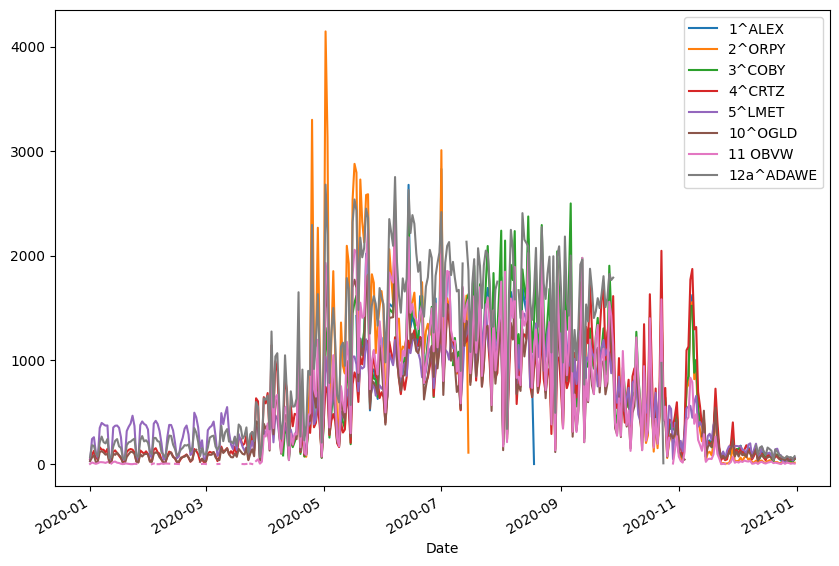

In [38]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

They all follow roughly the same pattern. Lets fill NaN values with the mean from the other counters on that day

In [39]:
countercolumns = ['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE']
for colname in countercolumns:
    othercolumns = [c for c in countercolumns if c != colname]
    meanofmissing = data2020[data2020[colname].isna()][othercolumns].mean(axis=1)
    data2020.loc[data2020[colname].isna(), colname] = meanofmissing

<Axes: xlabel='Date'>

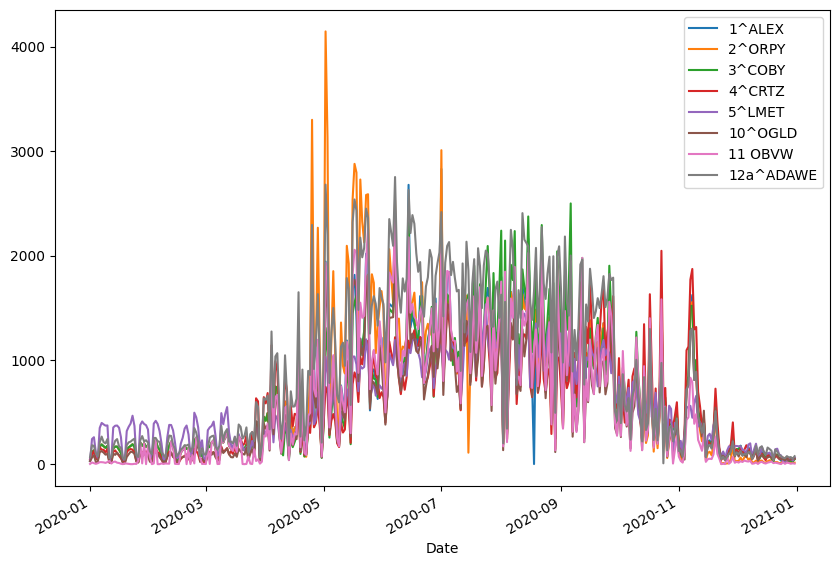

In [40]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

In [41]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     365 non-null    float64       
 2   2^ORPY                     365 non-null    float64       
 3   3^COBY                     365 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    365 non-null    float64       
 7   11 OBVW                    365 non-null    float64       
 8   12a^ADAWE                  365 non-null    float64       
 9   Max Temp (°C)              365 non-null    float64       
 10  Total Rain (mm)            365 non-null    float64       
 11  Total Snow (cm)            365 non-null    float64       
 12  Snow on 

We have the full data now. All fields are filled in ith hopefully reasonable values. We finally have a clean dataset we can work with. Remember all the way from the beginning, we want to predict the number of cyclist depending on the weather. We can either build a model for each bike lane.

Let's save the cleaned dataset to a file

In [42]:
data2020.to_csv('data2020.csv', index=False)

# Linear Regression

The easiest machine learning model is linear regression. It assumes that all relations with the various weather effects are linear which may not be completely true. Think about temperature. Too cold deters some cyclist, but so might too warm.

We will use scikit learn as our machine learning package. This is by far from the only one, but it's a nice one.

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

We will need to train of model and then we need to test our model to see if it any good. A very common way of doing this is to split your data set into a training and testing set. Sklearn has the function `train_test_split` for that.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', 'Max Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')

In [47]:
X = data2020[['Max Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)']]
y = data2020[['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

Now fit the model

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([[ 37.90401985, -19.72547267,   4.42032883,  -4.27268338,
          2.6173684 ,  -0.4140822 ],
       [ 41.54931176, -25.01169119,   1.5788843 ,  -7.76593818,
          0.58419272,   4.05683319],
       [ 40.46590951, -19.71393803,   7.31860788,  -1.67172248,
          3.1332149 ,  -3.42690576],
       [ 28.61744826, -17.98862943,   3.46471316,  -6.35867106,
          3.986884  ,  -5.02050508],
       [ 29.36059965, -15.03016598,   1.05145524,   0.47643894,
          2.47265762,  -1.97871311],
       [ 30.33803691, -17.03497019,   1.951493  ,  -5.74178117,
          1.01113533,  -0.40021302],
       [ 39.74998937, -18.79216028,   9.87682027,  -3.51077069,
          1.35243565,   1.39566495],
       [ 50.19547837, -25.32731899,   8.29126181,  -7.18174981,
          3.54750393,   2.85489662]])

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
predictions = model.predict(X_test)

In [52]:
r2_score(y_test, predictions)

0.6811000160991666

In [53]:
mean_squared_error(y_test, predictions, squared=False)

331.0010430084566

Let's see how well this works for 2019. Our data set was for 2020.

In [55]:
bike2019 = pd.read_excel('./data/bike_counter.xlsx', sheet_name="2019")

We don't care too much about fixing the weather data for just comparing, but at least fill in the missing snow otherwise we will miss too much.

In [57]:
weather2019 = pd.read_csv('./data/en_climate_daily_ON_6106001_2019_P1D.csv')
weather2019 = weather2019[['Date/Time', 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)',
             'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']]
weather2019['Snow on Grnd (cm)'] = weather2019['Snow on Grnd (cm)'].fillna(method='backfill')

Now drop all rows with NA values. We also need to reset the index in pandas otherwise assigning values becomes a bit weird later on.

In [58]:
weather2019 = weather2019.dropna().reset_index().drop('index', axis=1)

Do the prediction using the 2019 weather.

In [59]:
bikepred2019 = pd.DataFrame(
    model.predict(
        weather2019.drop('Date/Time', axis=1)),
        columns=['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE'])
bikepred2019['Date'] = weather2019[['Date/Time']].astype('datetime64')

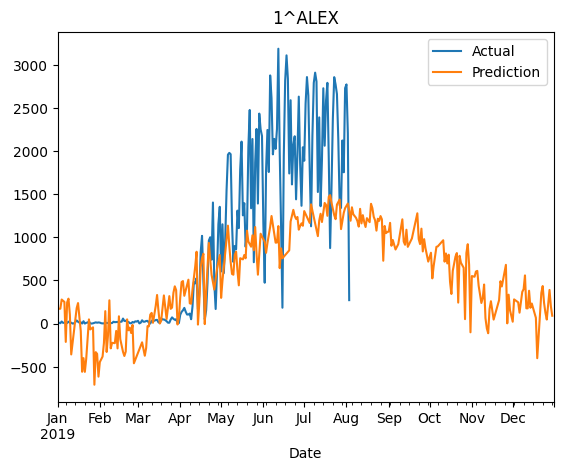

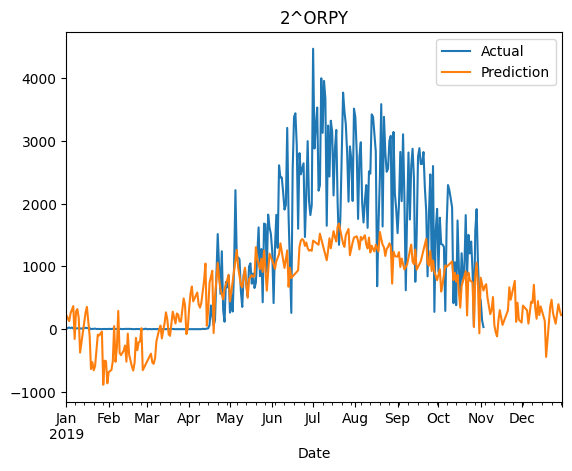

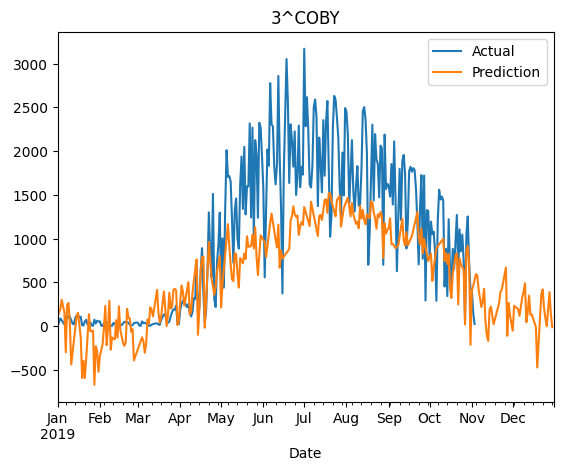

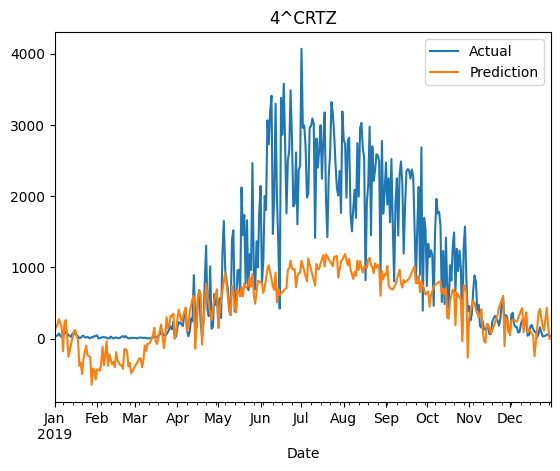

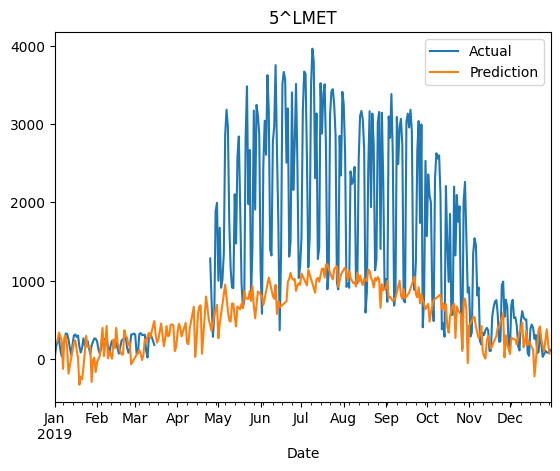

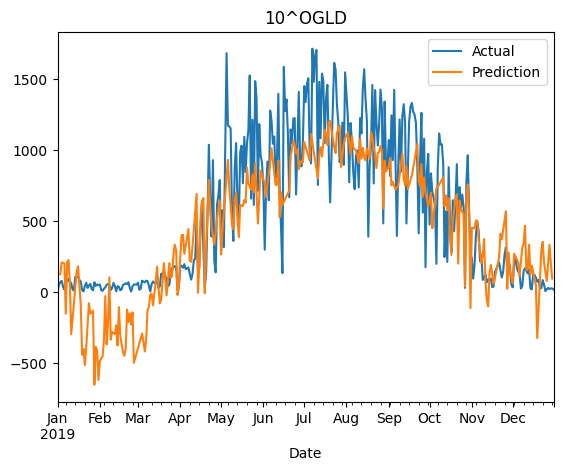

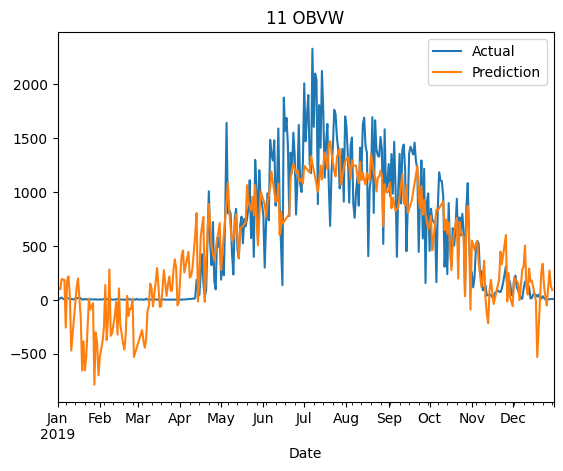

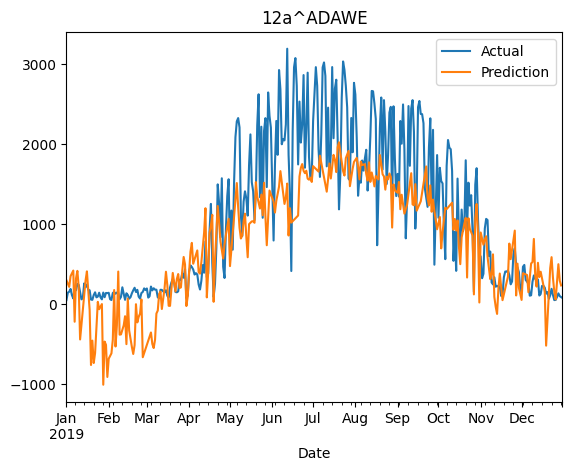

In [60]:
for colname in ['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE']:
    ax = bike2019.plot(x='Date', y=colname, label='Actual', title=colname)
    bikepred2019.plot(x='Date', y=colname, ax=ax, label='Prediction')

# Conclusion
The model works fairly well for some of the lanes, but rather poorly for some of the others. It always reproduces the overall trend though. Keep in mind that the data was not part of the training data. It's solely reproducing this trend from the weather data